In [ ]:
pip install tensorflow scikit-learn pandas


LIBRARIES

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
import matplotlib.pyplot as plt

Data Processessing


In [ ]:

file_path = 'path_to_your_dataset.csv'  # Replace with your file path
df = pd.read_csv('/content/FOOD-DATA-GROUP5.csv')

#null values remove
df_cleaned = df.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "food"]).fillna(0)

# Separate features and target variable
X = df_cleaned.drop(columns=["Nutrition Density"])
y = df_cleaned["Nutrition Density"]
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)




Model Building

In [ ]:
# Build the model
model = Sequential([
    Dense(64, activation='relu', kernel_regularizer=l2(0.001), input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(16, activation='relu', kernel_regularizer=l2(0.001)),
    Dense(1)
])


model.compile(optimizer='adam', loss='mse', metrics=['mae'])


history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=500, batch_size=32, verbose=1)



Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 17041.8613 - mae: 73.3228 - val_loss: 20206.5762 - val_mae: 74.2761
Epoch 2/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18821.1855 - mae: 77.4451 - val_loss: 20084.8867 - val_mae: 73.7484
Epoch 3/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17266.3086 - mae: 72.5763 - val_loss: 19818.6543 - val_mae: 72.7437
Epoch 4/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17086.0527 - mae: 69.8572 - val_loss: 19261.2812 - val_mae: 70.8252
Epoch 5/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 17860.0293 - mae: 71.6630 - val_loss: 18140.2480 - val_mae: 67.2928
Epoch 6/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 22671.1777 - mae: 76.7969 - val_loss: 15897.0449 - val_mae: 61.1236
Epoch 7/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10360.2158 - mae: 53.2839 - val_loss: 12192.8760 - val_mae: 50.5508
Epoch 8/500
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8178.3472 - mae: 46.2018 - val_loss: 7820.4424 - val_mae: 37.17

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Import necessary metrics

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred) # Now you can use mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Absolute Error (MAE): 3.2861983719924392
Mean Squared Error (MSE): 29.58398638554663
R-squared (R2): 0.9979876253482498


Plot training and validation errors

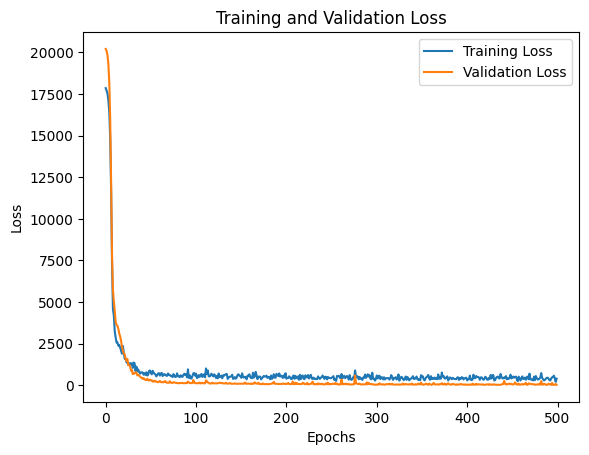

In [ ]:

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
def get_user_input(): #edit so user input takes in daily log of foods eaten + how they felt aftwerwards
    print("Provide your daily dietary goals:")
    calorie_needs = float(input("Enter your daily calorie goal: "))
    protein_ratio = float(input("Enter your desired percentage of protein (e.g., 0.3 for 30%): "))
    fat_ratio = float(input("Enter your desired percentage of fat (e.g., 0.2 for 20%): "))
    carb_ratio = 1 - (protein_ratio + fat_ratio)  # Remaining percentage is for carbs

    user_nutritional_goals = {
        'Caloric Value': calorie_needs,
        'Proteins': (protein_ratio * calorie_needs) / 4,   # 1g protein = 4 calories
        'Fat': (fat_ratio * calorie_needs) / 9,            # 1g fat = 9 calories
        'Carbohydrates': (carb_ratio * calorie_needs) / 4  # 1g carbohydrate = 4 calories
    }
    return user_nutritional_goals # Remove the extra indentation

In [ ]:
def get_user_input():
    print("Provide your daily dietary goals:")
    
    # Ask user for their goals
    calorie_needs = float(input("Enter your daily calorie goal: "))
    protein_ratio = float(input("Enter your desired percentage of protein (e.g., 0.3 for 30%): "))
    fat_ratio = float(input("Enter your desired percentage of fat (e.g., 0.2 for 20%): "))
    carb_ratio = 1 - (protein_ratio + fat_ratio)  # Remaining percentage is for carbs

    # Calculate macro goals in grams
    user_nutritional_goals = {
        'Caloric Value': calorie_needs,
        'Proteins': (protein_ratio * calorie_needs) / 4,   # 1g protein = 4 calories
        'Fat': (fat_ratio * calorie_needs) / 9,            # 1g fat = 9 calories
        'Carbohydrates': (carb_ratio * calorie_needs) / 4  # 1g carb = 4 calories
    }

#ask user for daily food log
print("\Now enter your food log for the day.")
food_log= []
while True:
        food = input("Enter food item (or type 'done' to finish): ")
        if food.lower() == 'done':
            break
        feeling = input(f"How did you feel after eating {food}? (e.g., energetic, bloated, satisfied): ")
        food_log.append({'food': food, 'feeling': feeling})

 # Combine both pieces of data
user_data = {
        'Goals': user_nutritional_goals,
        'Food Log': food_log
    }
 

#return user_data


In [ ]:
#OLD CODE # def recommend_food(model, scaler, df, user_goals): # output whether or not a food is suitable based on user responses
    
#     # Get the feature names used during training (assuming X_train is available globally)
#     feature_names = X_train.columns.tolist()  # Assuming X_train is a pandas DataFrame

#     # Ensure the same features are selected and in the same order
#     features = df[feature_names]

#     features_scaled = scaler.transform(features)

#     # Predict caloric values using the trained model
#     predicted_calories = model.predict(features_scaled)
#     df['predicted_calories'] = predicted_calories

#     # Calculate how closely each food matches the user's nutritional needs
#     df['calorie_diff'] = abs(df['predicted_calories'] - user_goals['Caloric Value'])
#     df['protein_diff'] = abs(df['Protein'] - user_goals['Proteins'])
#     df['fat_diff'] = abs(df['Fat'] - user_goals['Fat'])
#     df['carb_diff'] = abs(df['Carbohydrates'] - user_goals['Carbohydrates'])

#     # Rank foods based on how closely they match the user's goals
#     df['total_diff'] = df['calorie_diff'] + df['protein_diff'] + df['fat_diff'] + df['carb_diff']
#     recommended_foods = df.sort_values(by='total_diff').head(10)
#     print("\nTop 10 Food Recommendations based on your nutritional goals:")
#     print(recommended_foods[['food', 'Caloric Value', 'Protein', 'Fat', 'Carbohydrates', 'total_diff']])
#     # Collect user input
# user_goals = get_user_input()

# # Provide food recommendations based on user goals
# recommend_food(model, scaler, df, user_goals)

#new code that outputs whether or not a food is suitable
def check_food_suitability(model, scalar, df):
    feature_names = X_train.columns.tolist()

    features = df[feature_names] #prep and scale features
    features_scaled = scaler.transform(features) 

    #for predicting suitability (1=suitable & 0=non suitable)
    predictions = model.predict(features_scaled)

#confidence scores
    if hasattr(model, "predict_probability"):
        confidence_scores = model.predict_probability(features_scaled)[:,1]
        df['confidence'] = confidence_scores

    df['suitability'] = predictions #whether or not a food is suitable

    #output the results
    for idx, row in df.iterrows():
        food_name = row.get('food', f"Food #{idx + 1}")
        status = "Suitable" if row['suitability'] == 1 else "Not Suitable"

        #last thing
    if 'confidence' in row: print(f"{food_name}: {status} (Confidence: {row['confidence']:.2f})") 
    else: print(f"{food_name}: {status}")


Provide your daily dietary goals:
Enter your daily calorie goal: 40
Enter your desired percentage of protein (e.g., 0.3 for 30%): .5
Enter your desired percentage of fat (e.g., 0.2 for 20%): .3
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Top 10 Food Recommendations based on your nutritional goals:
                         food  Caloric Value  Protein  Fat  Carbohydrates  \
408             tempeh cooked             55      5.1  3.2            2.6   
493     pumpkin leaves cooked             15      1.9  0.2            2.4   
547               spinach raw              7      0.9  0.1            1.1   
452              purslane raw              9      0.9  0.2            1.5   
461   sweet potato leaves raw             15      0.9  0.2            3.1   
697      side salad mcdonalds             17      0.9  0.2            3.7   
444                tomatillos             42      1.3  1.3            7.7   
491  mung bean sprouts cooked             24      2.5  0.1            4.5   
655        p

In [ ]:
#what should we do first?
#1 work on editing the two code blocks (split up) which one the first two?- the last two with comments at the top
#2 work on pushing to github repo (i can do this) thank you but if you have time i will be grateful to learn- i can screenrecord it but its mainly just changing the repo destination and pushing since i started the liveshare/file is openon my computer i think i have to push
#screen recording will be okay so that i can also visit it anytime- ok np
#3 research llms and write justification on why chatgpt (individually later tdy) good idea
#4 maybe look into setup for api call if we have time still
#5 update notes and stuff in google doc!
#6 Did you see Saaks message in discord? what do you think? yea i just saw it
# i think we should update our plans rq and then look at his ideas if there's anything to add (editing the user input and output to align with features discussed in meeting) good idea, so we should edit the first two blocks - the final two(Current editing), the first two when we get the updated dataset i think?(after Zaria and Elia? yeah -then how about the LLLM thing in vs code - i think we can focus on this tmr but tdy do the writeup for why we choosse chatgpt over other ai and why we're combining llm with model okay 